In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def morle_func(x, alpha=1.0):
    t = x / alpha
    return np.exp(-t**2) * np.exp(1j * t * 2 * np.pi)

/home/kirill/digitalOS/env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kirill/digitalOS/env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


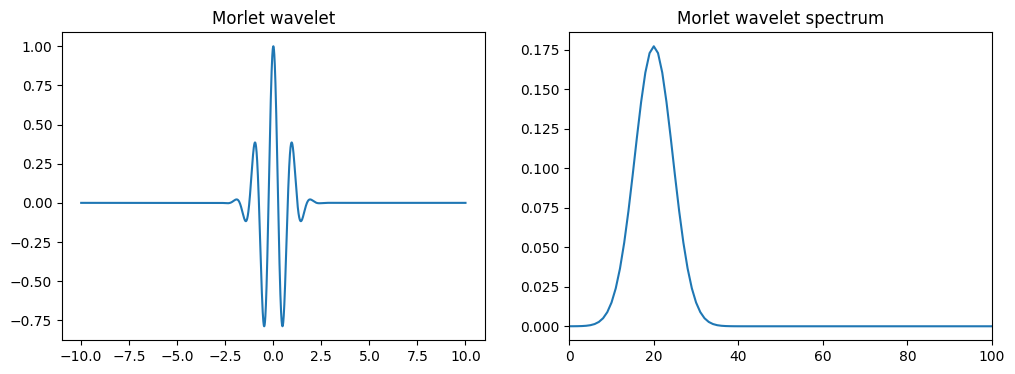

In [3]:
t = np.linspace(-10, 10, 10000)
morle = morle_func(t, 1)

frequencies = np.arange(len(t))
morle_fft = np.fft.fft(morle) / len(t)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, morle)
plt.title('Morlet wavelet')

plt.subplot(1, 2, 2)
plt.plot(frequencies, 2 * np.abs(morle_fft))
plt.xlim(0, 100)
plt.title('Morlet wavelet spectrum')

plt.show()

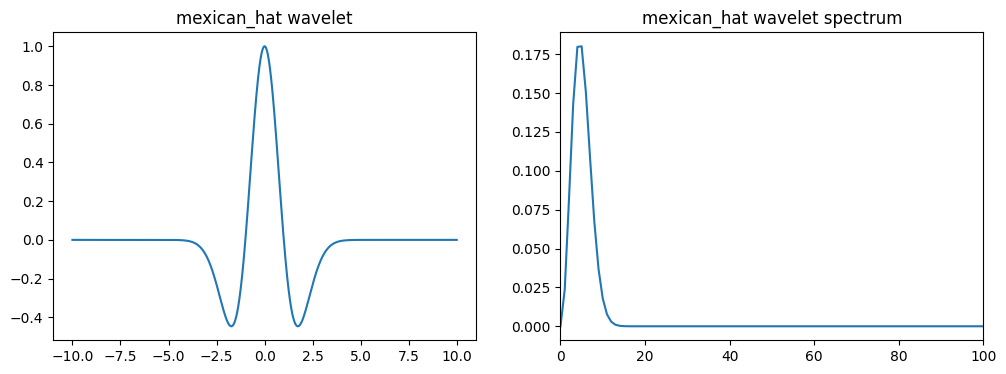

In [4]:
def mexican_hat_func(x, alpha=1.0):
    t = x / alpha
    return (1 - t**2) * np.exp(-t**2 / 2)

t = np.linspace(-10, 10, 10000)
mexican_hat = mexican_hat_func(t, 1)

frequencies = np.arange(len(t))
mexican_hat_fft = np.fft.fft(mexican_hat) / len(t)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, mexican_hat)
plt.title('mexican_hat wavelet')

plt.subplot(1, 2, 2)
plt.plot(frequencies, 2 * np.abs(mexican_hat_fft))
plt.xlim(0, 100)
plt.title('mexican_hat wavelet spectrum')

plt.show()

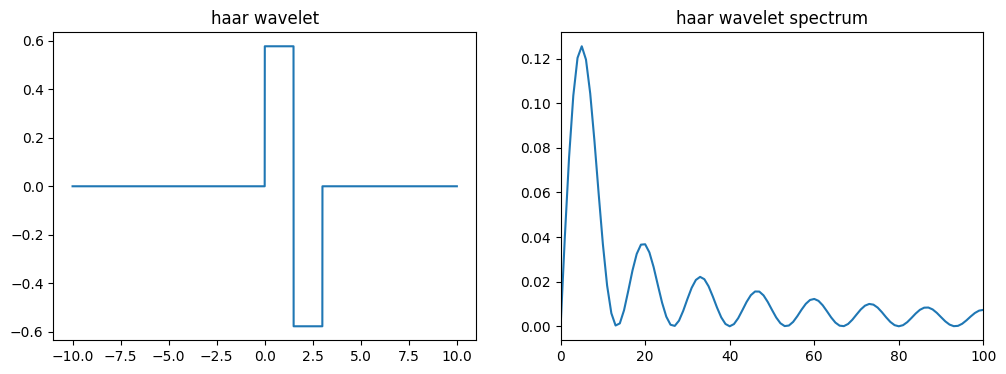

In [5]:
def haar_func(x, alpha):
    haar = np.zeros(len(t))
    x = x / alpha
    for i, xi in enumerate(x):
        if 0 <= xi and xi < 0.5:
            haar[i] = 1
        if 0.5 <= xi and xi < 1:
            haar[i] = -1
    return (1 / np.sqrt(alpha)) * haar

t = np.linspace(-10, 10, 10000)
haar = haar_func(t, 3)

frequencies = np.arange(len(t))
haar_fft = np.fft.fft(haar) / len(t)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, haar)
plt.title('haar wavelet')

plt.subplot(1, 2, 2)
plt.plot(frequencies, 2 * np.abs(haar_fft))
plt.xlim(0, 100)
plt.title('haar wavelet spectrum')

plt.show()

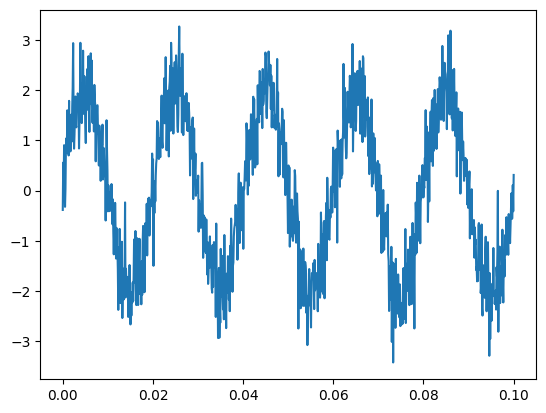

In [21]:
def signal_gen(x, A=2.0, f=50, noise=None):
    s = A * np.sin(x * 2 * np.pi * f)
    if noise:
        s += np.random.normal(0, 1, t.shape) * noise
    return s

x = np.linspace(0, 0.1, 1000)
y = signal_gen(x, noise=0.5)

plt.plot(x, y)

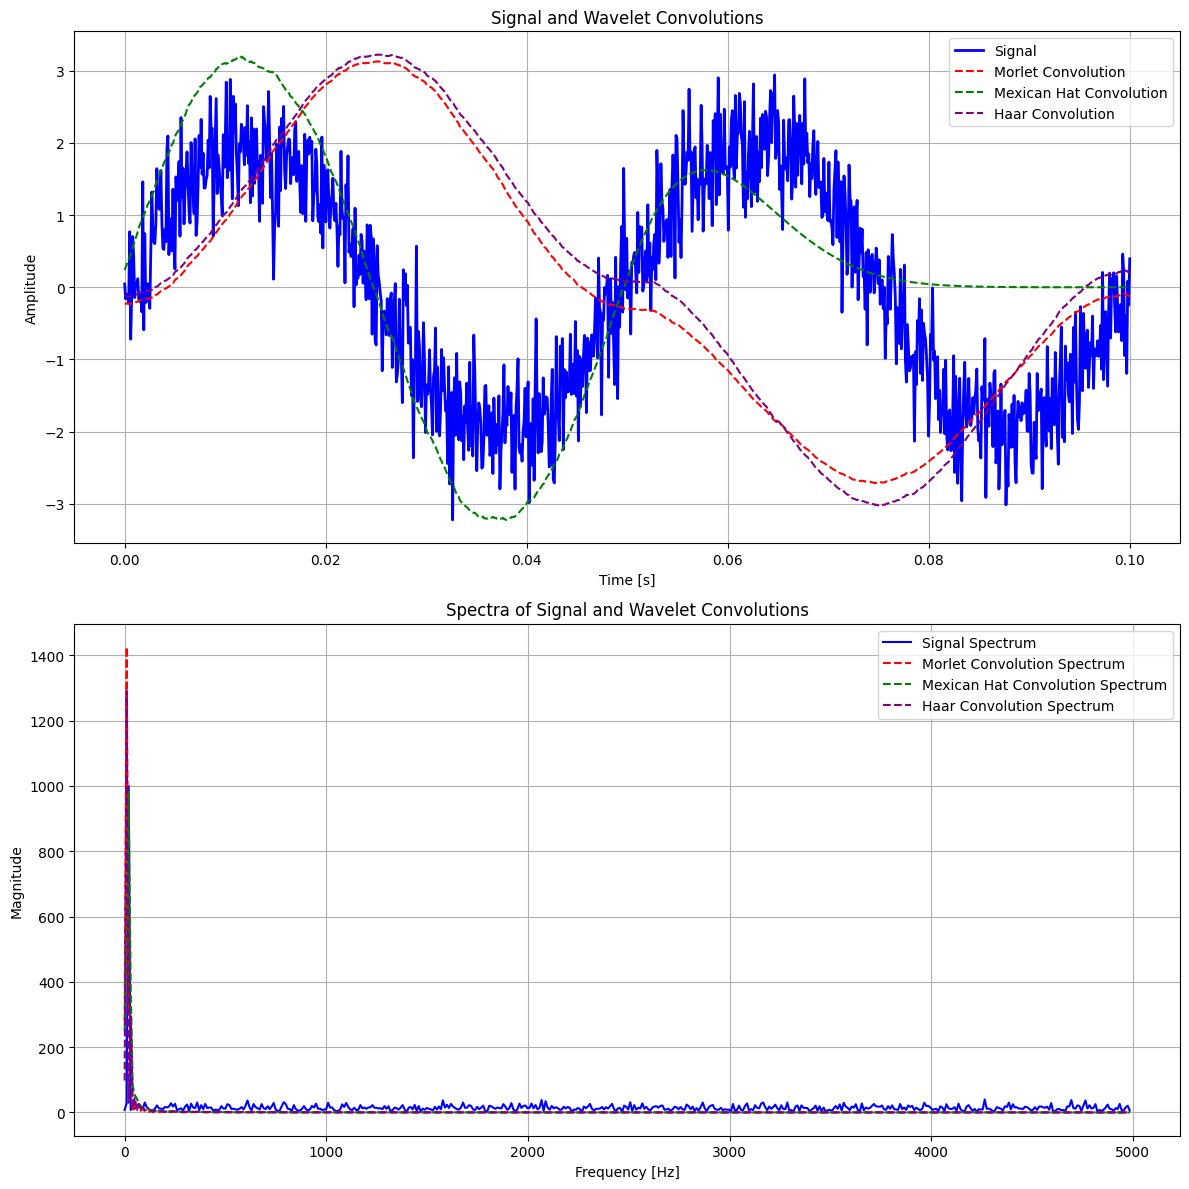

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

t = np.linspace(0, 0.1, 1000)
signal = signal_gen(t, f=20, A=2.0, noise=0.5) 

morle = morle_func(t, 0.9)
mexican_hat = mexican_hat_func(t, 0.01)
haar = haar_func(t, 3)

morle_conv_signal = convolve(signal, morle, mode='same')
mexican_hat_conv_signal = convolve(signal, mexican_hat, mode='same')
haar_conv_signal = convolve(signal, haar, mode='same')

morle_conv_signal = morle_conv_signal / np.max(np.abs(morle_conv_signal)) * np.max(np.abs(signal))
mexican_hat_conv_signal = mexican_hat_conv_signal / np.max(np.abs(mexican_hat_conv_signal)) * np.max(np.abs(signal))
haar_conv_signal = haar_conv_signal / np.max(np.abs(haar_conv_signal)) * np.max(np.abs(signal))

def compute_spectrum(signal, dt):
    N = len(signal)
    freq = np.fft.fftfreq(N, d=dt)
    spectrum = np.fft.fft(signal)
    return freq[:N//2], np.abs(spectrum[:N//2])

dt = t[1] - t[0]

signal_freq, signal_spectrum = compute_spectrum(signal, dt)
morle_freq, morle_spectrum = compute_spectrum(morle_conv_signal, dt)
mexican_hat_freq, mexican_hat_spectrum = compute_spectrum(mexican_hat_conv_signal, dt)
haar_freq, haar_spectrum = compute_spectrum(haar_conv_signal, dt)

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(t, signal, color='blue', label='Signal', linewidth=2)
plt.plot(t, morle_conv_signal, color='red', label='Morlet Convolution', linestyle='--')
plt.plot(t, mexican_hat_conv_signal, color='green', label='Mexican Hat Convolution', linestyle='--')
plt.plot(t, haar_conv_signal, color='purple', label='Haar Convolution', linestyle='--')
plt.title('Signal and Wavelet Convolutions')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(signal_freq, signal_spectrum, color='blue', label='Signal Spectrum')
plt.plot(morle_freq, morle_spectrum, color='red', label='Morlet Convolution Spectrum', linestyle='--')
plt.plot(mexican_hat_freq, mexican_hat_spectrum, color='green', label='Mexican Hat Convolution Spectrum', linestyle='--')
plt.plot(haar_freq, haar_spectrum, color='purple', label='Haar Convolution Spectrum', linestyle='--')
plt.title('Spectra of Signal and Wavelet Convolutions')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


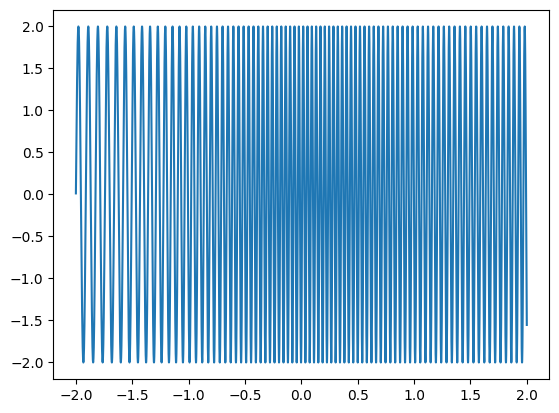

In [31]:
import scipy

def get_sin_with_time(fc, A, a, b, noise=None):
    srate = fc
    t = np.arange(a, b, 1/srate)
    ln = len(t)
    freqmod = np.exp(-t**2) * 10 + 10
    freqmod = freqmod + np.linspace(0, 10, ln)
    signal = A * np.sin(2 * np.pi * (t + np.cumsum(freqmod)/srate))
    return t, signal


def spectrogram123(start, end, signal, time, type = None):
        Freq1 = 50
        Freq2  = np.linspace(start, end, Freq1)
        fwhm  = .2 
        pnts = len(time)
        Ws = np.zeros((Freq1, len(time)), dtype=complex)

        for wi in range(0, Freq1):
            if type == 'morle':
                gauss = np.exp(-(4 * np.log(2) * time**2) / fwhm**2)
                Ws[wi, :] = np.exp(1j * 2 * np.pi * Freq2[wi] * time) * gauss
            if type == 'mexh':
                gauss = np.exp(-(time* Freq2[wi])**2 / 2)
                Ws[wi, :] = (1 - time **2) * gauss
            if type == 'haar':
                for i, x in enumerate(time):
                    if 0 <= x and x < 0.5 / Freq2[wi]:
                        Ws[wi,i] = 1 
                    if 0.5 / Freq2[wi] <= x and x < 1/ Freq2[wi]:
                        Ws[wi,i] = -1 
            
        conv = pnts * 2-1
        half = int(np.floor(pnts / 2) + 1)
        sigX = scipy.fftpack.fft(signal, conv)
        tf = np.zeros((Freq1, len(time)))
        for fi in range(0, Freq1):
            if type == 'haar':
                for i, t in enumerate(time):
                    tf[fi, i] = np.sum(signal[i : i +  int(500 / Freq2[fi])]) 
                    tf[fi, i] -= np.sum(signal[i +  int(500 / Freq2[fi]) : i +  int(1000 / Freq2[fi])]) 
            else:
                waveX = scipy.fftpack.fft(Ws[fi,:], conv)
                waveX = waveX / np.max(waveX)
                conv_res = scipy.fftpack.ifft(waveX * sigX)
                conv_res = conv_res[half - 3 : -half]
                tf[fi, :] = np.abs(conv_res)**2
        print(np.min(tf))
        print(np.max(tf))
        plt.contourf(time, Freq2, tf)
        print(time.shape, Freq2.shape, tf.shape)
        plt.xlabel('Время')
        plt.ylabel('Частота')
        plt.title('Частотно-временная характеристика')
        plt.show()

t, signal = get_sin_with_time(fc=10000, A=2.0, a=-2, b=2)
plt.plot(t, signal)



3.8855841960095566e-33
1.0049649433217114
(40000,) (50,) (50, 40000)


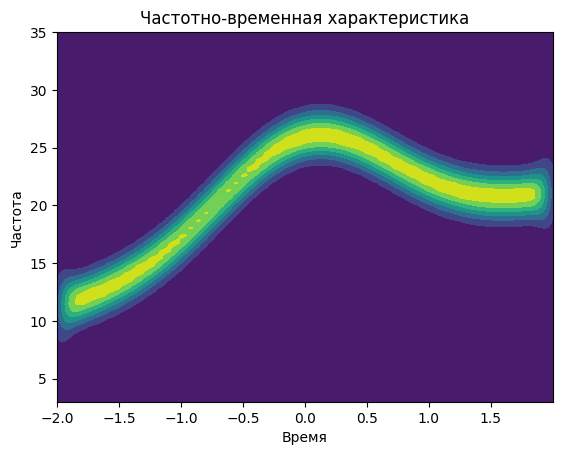

3.439519534214541e-35
4.006264918694354
(40000,) (50,) (50, 40000)


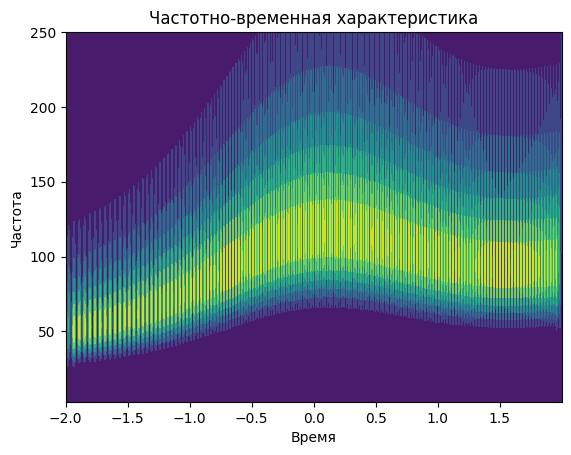

-482.59182313335936
482.58395624274794
(40000,) (50,) (50, 40000)


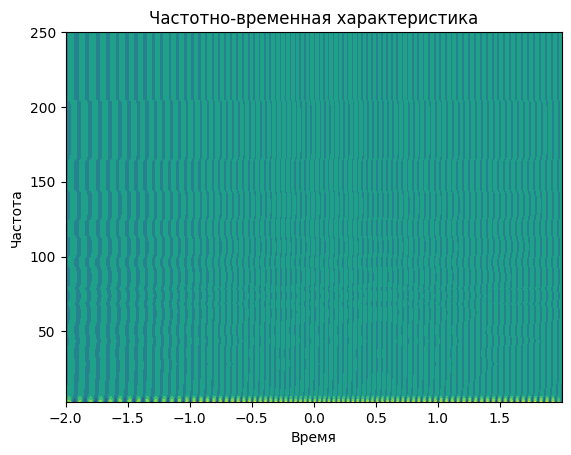

In [33]:
def spectrogram(start, end, signal, time, type = None):
    Freq1 = 50
    Freq2  = np.linspace(start, end, Freq1)
    fwhm  = .2 
    pnts = len(time)
    Ws = np.zeros((Freq1, len(time)), dtype=complex)

    for wi in range(0, Freq1):
        if type == 'morle':
            gauss = np.exp(-(4 * np.log(2) * time**2) / fwhm**2)
            Ws[wi, :] = np.exp(1j * 2 * np.pi * Freq2[wi] * time) * gauss
        if type == 'mexh':
            gauss = np.exp(-(time * Freq2[wi])**2 / 2)
            Ws[wi, :] = (1 - (time * Freq2[wi])**2) * gauss
        if type == 'haar':
            for i, x in enumerate(time):
                if 0 <= x and x < 0.5 / Freq2[wi]:
                    Ws[wi, i] = 1 
                if 0.5 / Freq2[wi] <= x and x < 1/ Freq2[wi]:
                    Ws[wi, i] = -1 

    conv = pnts * 2 - 1
    half = int(np.floor(pnts / 2) + 1)
    sigX = scipy.fftpack.fft(signal, conv)
    tf = np.zeros((Freq1, len(time)))
    
    for fi in range(0, Freq1):
        if type == 'haar':
            for i, t in enumerate(time):
                tf[fi, i] = np.sum(signal[i : i + int(500 / Freq2[fi])]) 
                tf[fi, i] -= np.sum(signal[i + int(500 / Freq2[fi]) : i + int(1000 / Freq2[fi])]) 
        else:
            waveX = scipy.fftpack.fft(Ws[fi, :], conv)
            waveX = waveX / np.max(waveX)
            conv_res = scipy.fftpack.ifft(waveX * sigX)
            conv_res = conv_res[half - 3 : -half]
            tf[fi, :] = np.abs(conv_res)**2
    
    print(np.min(tf))
    print(np.max(tf))
    plt.contourf(time, Freq2, tf)
    print(time.shape, Freq2.shape, tf.shape)
    plt.xlabel('Время')
    plt.ylabel('Частота')
    plt.title('Частотно-временная характеристика')
    plt.show()

spectrogram(3, 35, signal, t, 'morle')
spectrogram(3, 250, signal, t, 'mexh')
spectrogram(3, 250, signal, t, 'haar')

0.0
0.000310831501977943
(140928,) (50,) (50, 140928)


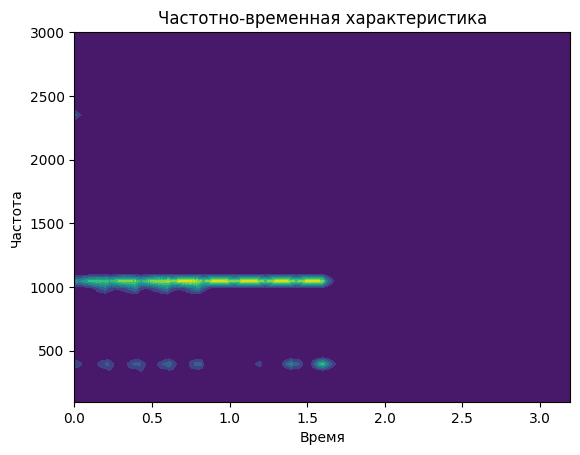

0.0
0.023358022694254247
(140928,) (50,) (50, 140928)


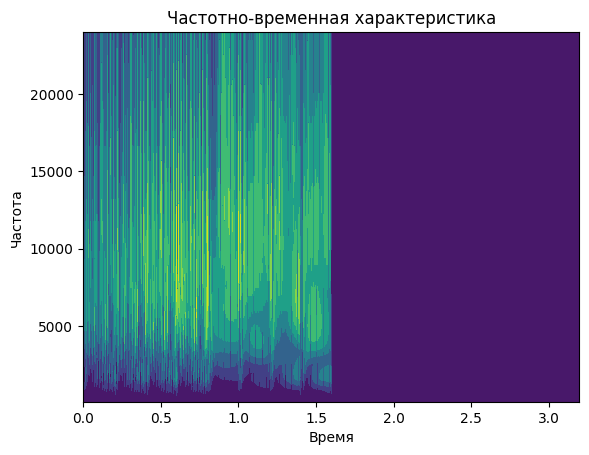

-1.1001765476393872
1.3422746170055244
(140928,) (50,) (50, 140928)


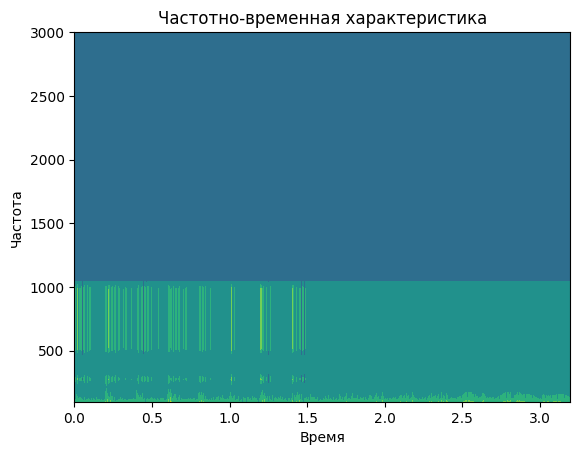

In [35]:
import scipy.io.wavfile as wavfile

rate, signal = wavfile.read('sample-3s.wav')

if signal.ndim > 1:
    signal = signal.mean(axis=1)
signal = signal / np.max(np.abs(signal))
time = np.arange(len(signal)) / rate
start_freq = 100
end_freq = 3000

spectrogram(start_freq, end_freq, signal, time, type='morle')
spectrogram(start_freq, end_freq*8, signal, time, type='mexh')
spectrogram(start_freq, end_freq, signal, time, type='haar')